# Aim of the project:


In [196]:
#importing required modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

# Loading data sets

In [31]:
df_cab = pd.read_csv(r"C:\Users\visha\Downloads\Cab_Data.csv")
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
1,10000029,02/01/2016,Pink Cab,BOSTON MA,21.34,324.21,226.204
2,10000030,02/01/2016,Pink Cab,BOSTON MA,41.30,646.06,454.300
3,10000041,02/01/2016,Pink Cab,CHICAGO IL,35.02,598.43,406.232
4,10000045,02/01/2016,Pink Cab,CHICAGO IL,3.24,48.04,33.696


In [32]:
df_transaction = pd.read_csv(r"C:\Users\visha\Downloads\Transaction_ID.csv")
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [33]:
df_customer = pd.read_csv(r"C:\Users\visha\Downloads\Customer_ID.csv")
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [34]:
df_city = pd.read_csv(r"C:\Users\visha\Downloads\City.csv")
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


# Data cleaning and preparation

In [35]:
#removing ',' from the numeric features in city data set 

df_city['Population'] = df_city['Population'].str.replace(',','')
df_city['Population'] = pd.to_numeric(df_city['Population'])


In [36]:
df_city['Users'] = df_city['Users'].str.replace(',','')
df_city['Users'] = pd.to_numeric(df_city['Users'])


In [37]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [38]:
final_df = pd.merge(df_cab, df_transaction, on='Transaction ID', how='inner')\
             .merge(df_customer, on='Customer ID', how='inner').merge(df_city, on='City', how='inner')

final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
1,10079404,21/09/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
2,10186994,23/06/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701
3,10320493,21/04/2018,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,28712,Cash,Male,53,11242,814885,24701
4,10000384,02/01/2016,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,814885,24701


In [39]:
final_df.shape

(359392, 14)

In [40]:
final_df.drop_duplicates()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
1,10079404,21/09/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
2,10186994,23/06/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701
3,10320493,21/04/2018,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,28712,Cash,Male,53,11242,814885,24701
4,10000384,02/01/2016,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10435911,25/12/2018,Yellow Cab,PITTSBURGH PA,18.36,311.07,251.1648,48736,Cash,Male,25,23815,542085,3643
359388,10433603,28/12/2018,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085,3643
359389,10435908,29/12/2018,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085,3643
359390,10435910,29/12/2018,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085,3643


In [41]:
#checking for any missing values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 38.4+ MB


In [42]:
final_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [43]:
#the customer ID column type should be object
final_df['Customer ID'] = final_df['Customer ID'].astype('object')

In [44]:
#converting date of travel to date type
final_df['Date of Travel'] = pd.to_datetime(final_df['Date of Travel'], dayfirst=True)

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  object        
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [46]:
#checking for unique values for categorical columns
cat_cols = [col for col in final_df.columns if final_df[col].dtype == 'object']

for col in cat_cols:
    print(final_df[col].value_counts())

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64
City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64
Customer ID
494      54
2939     53
1070     51
2766     51
126      50
         ..
12511     1
12288     1
13170     1
13385     1
50921     1
Name: count, Length: 46148, dtype: int64
Payment_Mode
Card    215504
Cash    143888
Name: count, dtype: int64
Gender
Male      205912
Female    153480
Name: count, dtype: int64


# Data Exploration

In [47]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
1,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
2,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701
3,10320493,2018-04-21,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,28712,Cash,Male,53,11242,814885,24701
4,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,814885,24701


In [48]:
final_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,35.336705,15048.822937,3.132198e+06,158365.582267
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,65.000000,35000.000000,8.405837e+06,302149.000000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,12.594234,7969.409482,3.315194e+06,100850.051020


In [49]:
#calculating profit column and adding it to final_df
final_df['Profit'] = final_df['Price Charged'] - final_df['Cost of Trip']
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,27.5680
1,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,210.0920
2,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701,118.9736
3,10320493,2018-04-21,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,28712,Cash,Male,53,11242,814885,24701,54.2548
4,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,814885,24701,877.0076


In [50]:
df_corr = final_df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Profit']].corr()

Text(0.5, 1.0, 'Correlation Matrix\n')

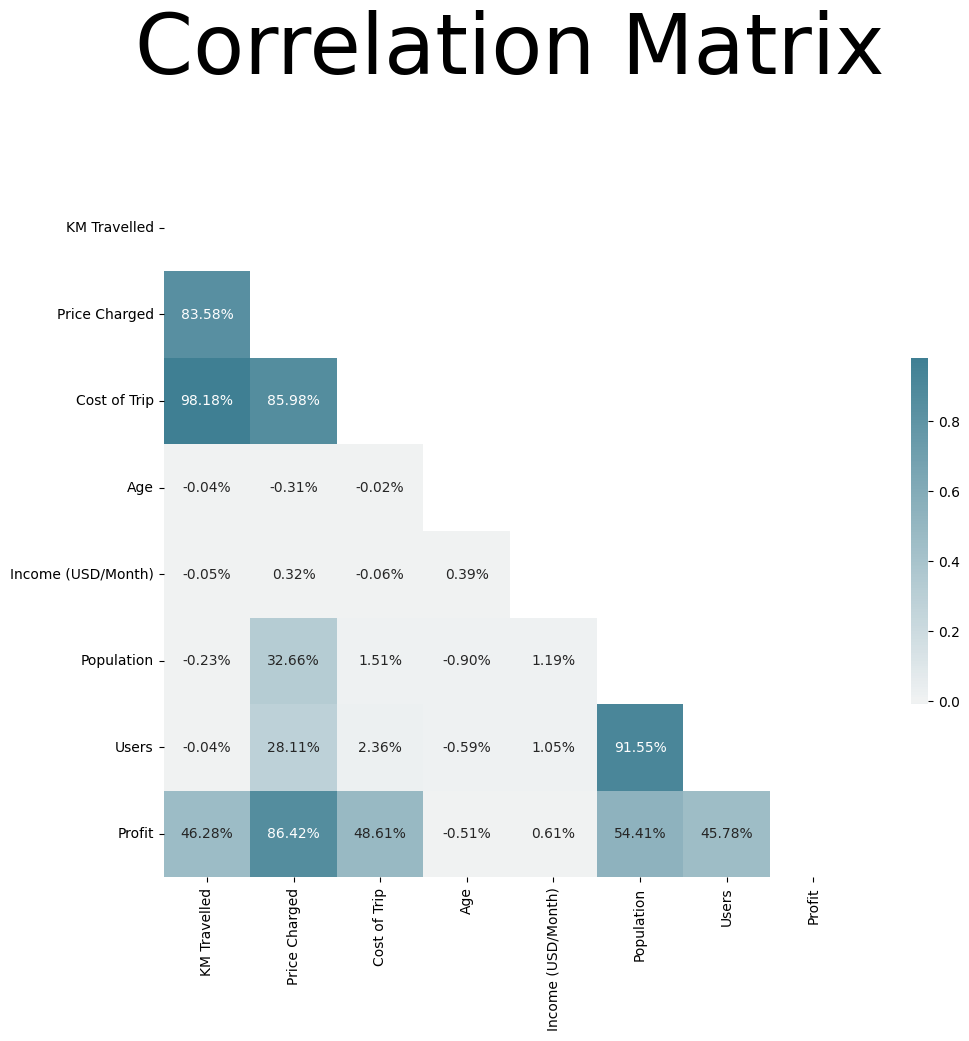

In [51]:
#plotting correlation matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df_corr,cmap = sns.diverging_palette(220, 220, as_cmap=True),
                mask=mask,
                center=0,
                square=True,
                annot=True,
                annot_kws={'fontsize':10},
                fmt='.2%',
                cbar_kws={'shrink':.5})
            

plt.title("Correlation Matrix\n",fontsize=60)

* From the above correlation matrix, we can observe that price charged, kms traveled and cost of trip are highly, positively correlated. This is obvious as the distance increases, cost and the profit margin increases. The price charged is highly correlated with profit which is expected as well (note that profit has been calculated by subtracting cost of travel from price charged)
* The number of users is also correlated with population which shows that cities with high population has large user base. 
* The population is moderately correlated with profit


In [52]:
num_cols = [col for col in final_df.columns if final_df[col].dtype in ['int64','float64']]
num_cols

['Transaction ID',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Age',
 'Income (USD/Month)',
 'Population',
 'Users',
 'Profit']

## Univariate Analysis
### Numerical features

<Axes: >

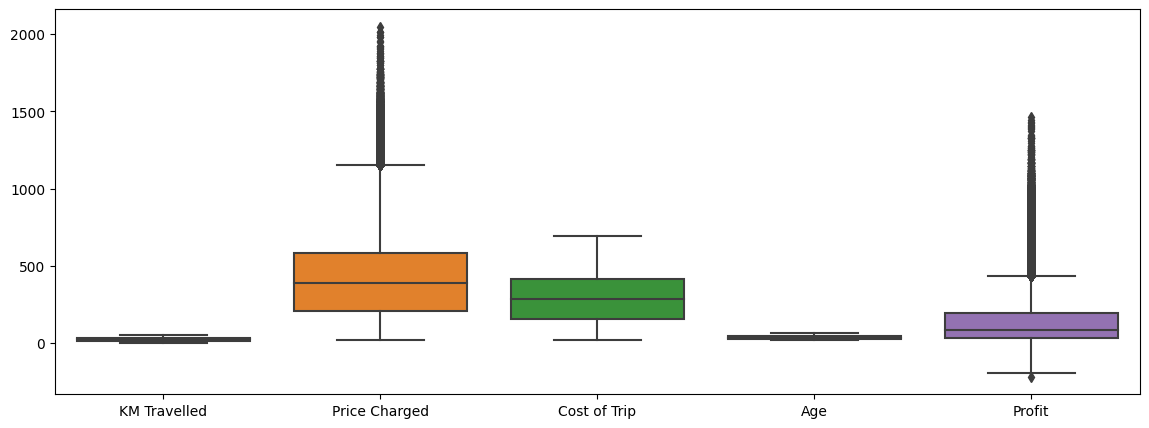

In [53]:
plt.figure(figsize=(14,5))
sns.boxplot(data=final_df[['KM Travelled','Price Charged','Cost of Trip','Age','Profit']], orient="v")

From the above boxplots, we can see that price charged and profit have outliers, this could be due to various reasons such as pricing difference due to peak times, seasonality, distance etc., Hence, these are not really outliers we need to be worried about. 

<Axes: >

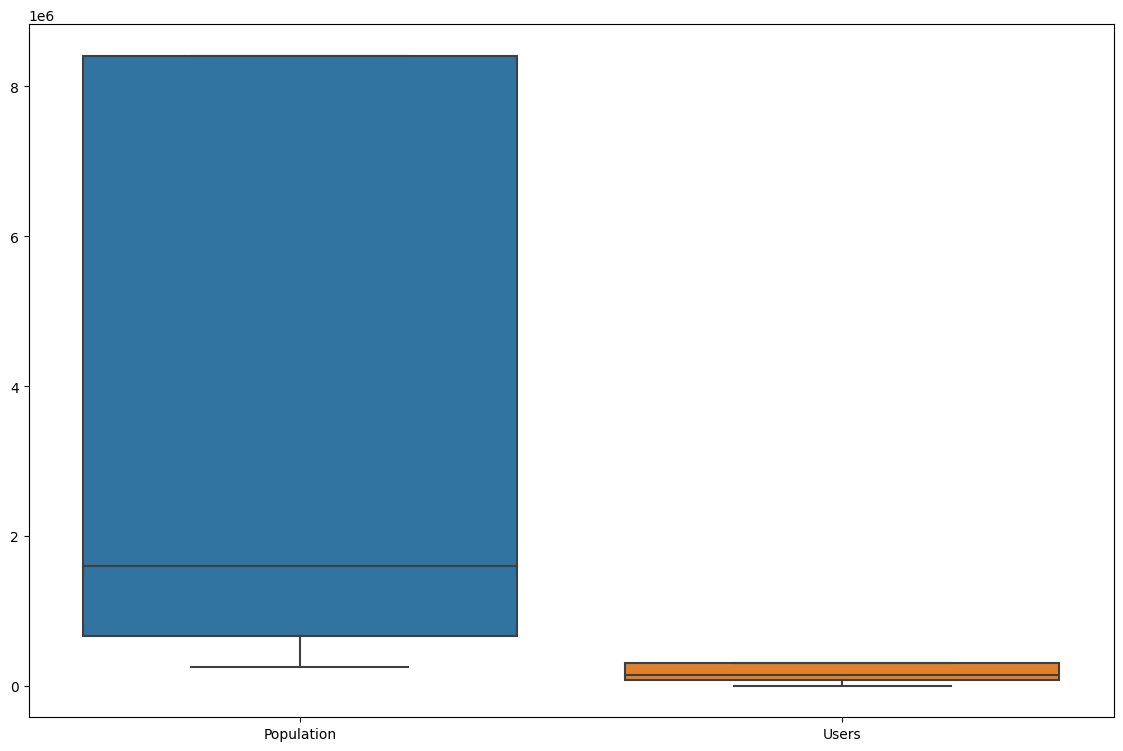

In [54]:
plt.rcParams['figure.figsize'] = (14,9)
sns.boxplot(data=final_df[['Population','Users']], orient='v')

No outliers are present

In [55]:
#Checking maximum ride share cities

city_names = final_df['City'].value_counts().index
ride_counts = final_df['City'].value_counts().values

In [ ]:
final_df.to_csv('final_data.csv',index=False)

([<matplotlib.patches.Wedge at 0x2709cb18d90>,
 [Text(0.4704362858312661, 0.9943287690564341, 'NEW YORK NY'),
  Text(-1.0674546493117416, 0.2655947508192636, 'CHICAGO IL'),
  Text(-0.6496836785217543, -0.8876435759145908, 'LOS ANGELES CA'),
  Text(0.4337645496631402, -1.0108651321791318, 'WASHINGTON DC'),
  Text(1.0386435919209385, -0.3622423069736216, 'BOSTON MA')],
 [Text(0.25660161045341784, 0.5423611467580549, '35.93%'),
  Text(-0.5822479905336772, 0.14486986408323468, '20.37%'),
  Text(-0.3543729155573205, -0.48416922322614037, '17.28%'),
  Text(0.23659884527080371, -0.5513809811886172, '15.73%'),
  Text(0.5665328683205118, -0.19758671289470267, '10.68%')])

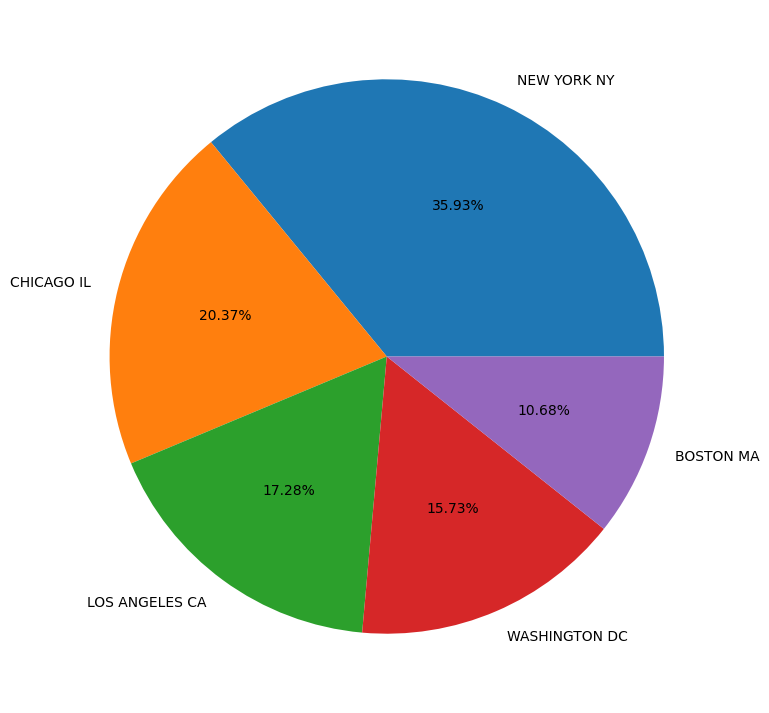

In [ ]:
plt.pie(x=ride_counts[:5], labels= city_names[:5], autopct='%1.2f%%' )

Only top 5 cities with highest ride count has been plotted above and it can be observed that New York has the highest share, followed by Chicago and Los Angeles.

In [ ]:
final_df.columns


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Profit'],
      dtype='object')

In [ ]:
final_df[['City','KM Travelled']].groupby('City').sum('KM Travelled').sort_values(by='KM Travelled', ascending=False)

,KM Travelled
City,
NEW YORK NY,2248809.74
CHICAGO IL,1281704.39
LOS ANGELES CA,1088735.65
WASHINGTON DC,989037.66
BOSTON MA,670388.18
SAN DIEGO CA,460503.69
SILICON VALLEY,193712.97
SEATTLE WA,180903.99
ATLANTA GA,168643.76


C:\Users\visha\AppData\Local\Temp\ipykernel_32900\2099454060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig=sns.distplot(final_df[column], color="g", label=column, norm_hist=True,
C:\Users\visha\AppData\Local\Temp\ipykernel_32900\2099454060.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig=sns.distplot(f

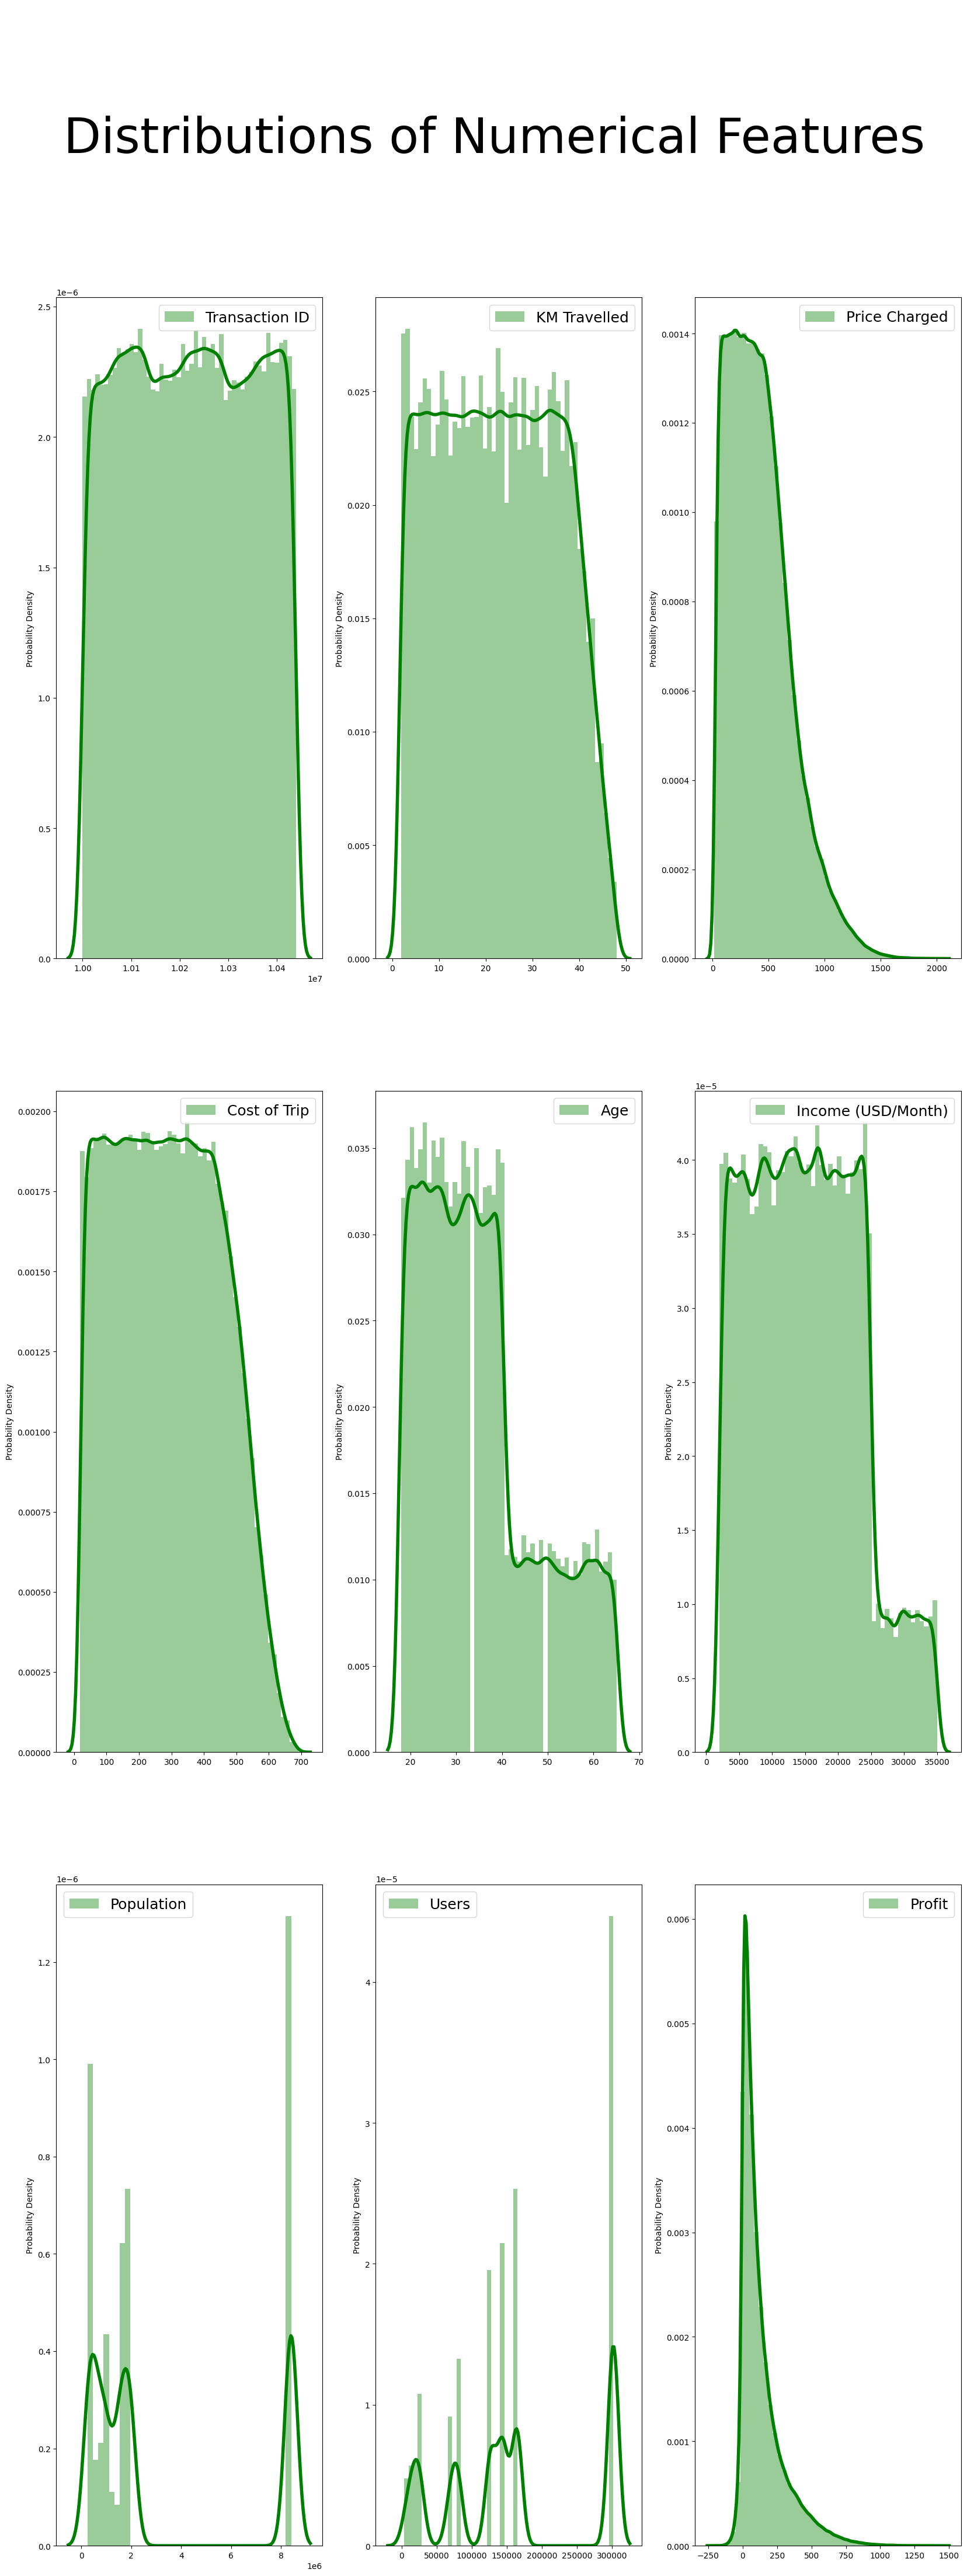

In [ ]:
n_rows, n_cols = (3,3)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(num_cols):
    
    i,j = (index // n_cols), (index % n_cols)
    
    fig=sns.distplot(final_df[column], color="g", label=column, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

### Categorical Features

n_rows, n_cols = (3, 2)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(cat_cols):
    i, j = index // n_cols, index % n_cols
    
    ax = axes[i, j]
    sns.countplot(x=column, data=final_df, label=column, palette=sns.cubehelix_palette(rot=-.35, light=0.85, hue=1), ax=ax)
    
    ax.set_title(column, fontsize=30)
    ax.set_xlabel(None)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

plt.show()


## Multivariate Analysis 

([<matplotlib.patches.Wedge at 0x270a14281d0>,
 [Text(-0.8119493082442254, 0.7421174575777908, 'Yellow Cab'),
  Text(0.8119493777262727, -0.742117381557607, 'Pink Cab')],
 [Text(-0.4428814408604866, 0.40479134049697674, '76.43%'),
  Text(0.44288147875978506, -0.4047912990314219, '23.57%')])

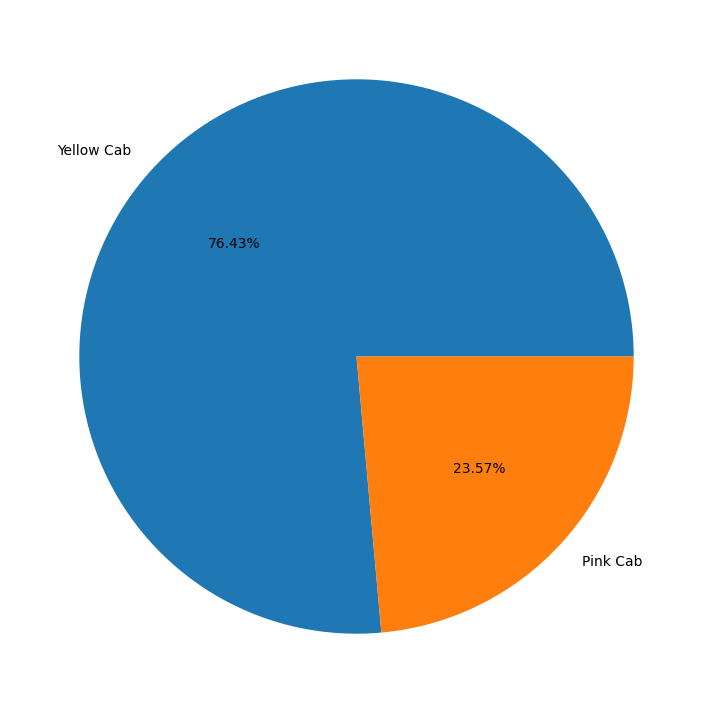

In [ ]:
# ride share percentage b/w yellow cabs and pink cabs

company_names = final_df['Company'].value_counts().index
company_rides = final_df['Company'].value_counts().values

plt.pie(x= company_rides, labels=company_names, autopct='%1.2f%%')

76.43% of the cab market is dominated by Yellow cabs while Pink Cab only accounts for 23.57%. Not assuming the data to be imbalanced considering the source to be authentic. 

Text(0.5, 1.0, '\nProft Distribution Between \nBoth Companies')

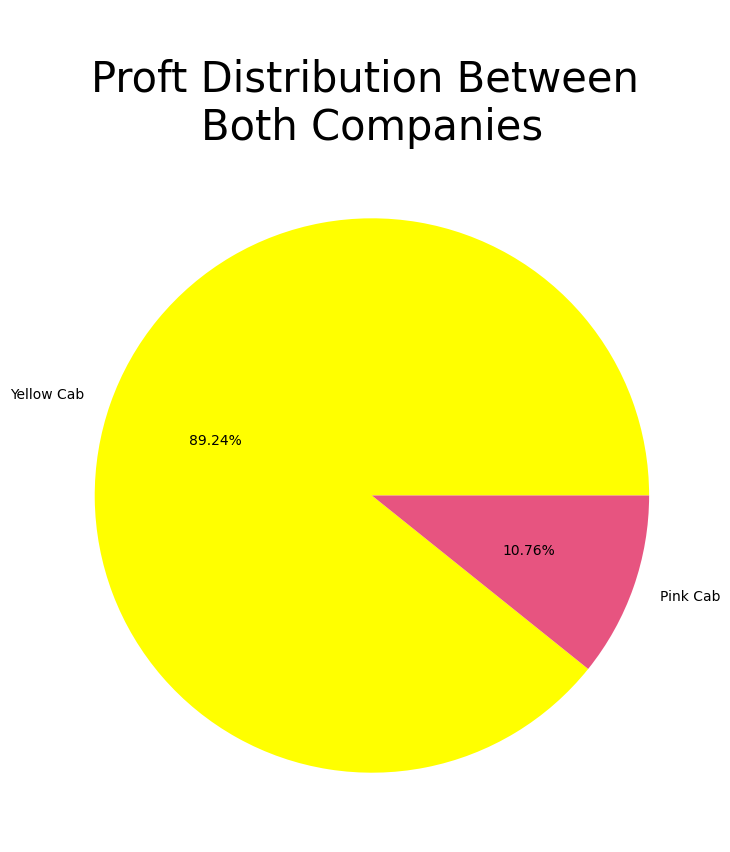

In [ ]:
#calculating profit percentage to see if the difference between ride distribution and profit distribution is similar
pink_profit = final_df[final_df['Company'] == 'Pink Cab'].Profit.sum()
yellow_profit = final_df[final_df.Company=='Yellow Cab'].Profit.sum()

plt.pie(x=(yellow_profit, pink_profit), labels=company_names, autopct= '%1.2f%%', colors=['yellow',(231/255, 84/255, 128/255)])

plt.title('\nProft Distribution Between \nBoth Companies', fontsize=30)


From the above plot it is evident that the profit is higher for Yellow cab and it is not really similar with the distribution of rides. 

In [58]:
#drawing a hypothesis that there is no significant difference between the age and profit earned

#performing t test with significance level of 0.05

t_statistic, p_value = ttest_ind(final_df.Age, final_df.Profit)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between Age and Profit.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between Age and Profit.")

T-Statistic: -379.95048801790426
P-Value: 0.0
Reject the null hypothesis. There is a significant difference between Age and Profit.


<Axes: xlabel='Age', ylabel='Profit'>

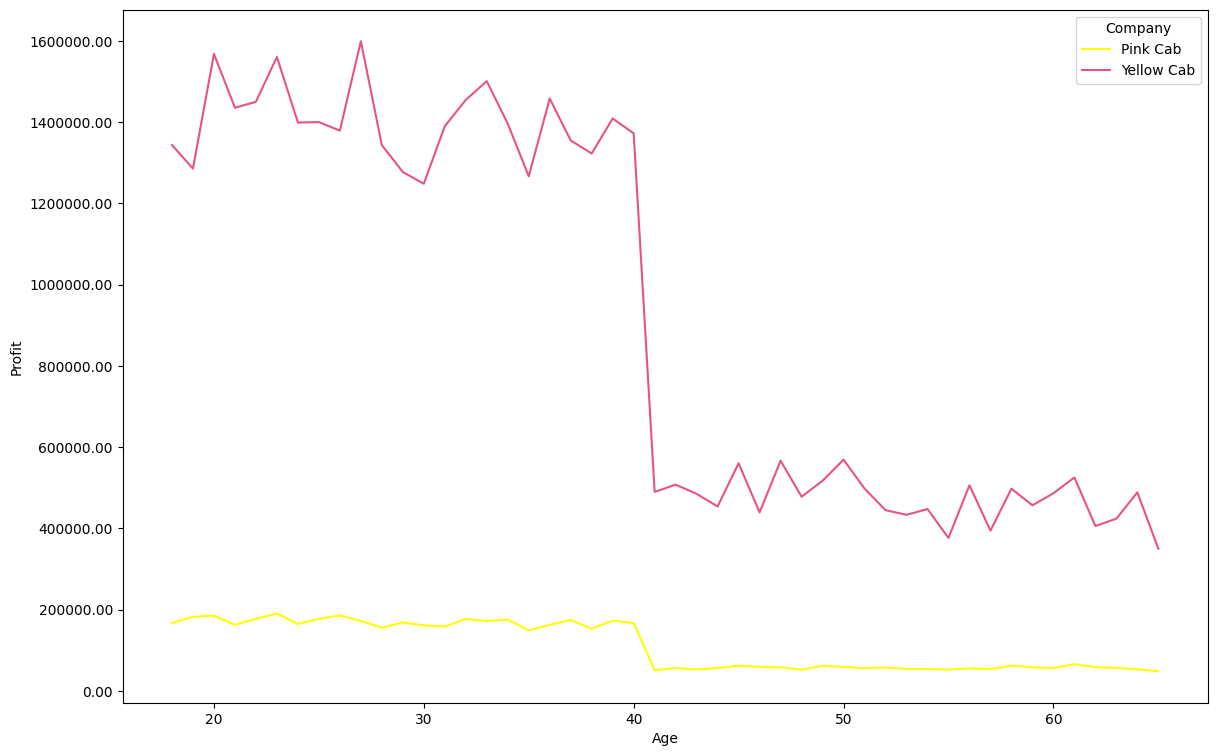

In [ ]:
#checking the scatterplot of age and profit 

profit_age = final_df.groupby(['Company','Age'])['Profit'].sum().reset_index()
pd.options.display.float_format = '{:.2f}'.format

profit_age = profit_age.copy()

def y_axis_formatter(value, tick_number):
    return '{:.2f}'.format(value)

# Apply the formatter to the y-axis
formatter = FuncFormatter(y_axis_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

sns.lineplot(data=profit_age, x='Age',y='Profit', hue='Company', palette=['yellow',(231/255, 84/255, 128/255)])


The above plot shows that there is a significant difference between age and the profit earned. The maximum profit is coming from the population aged less than 40 years. 

In [ ]:
#Assuming a alternative hypothesis is that age plays a significant role in the number of rides that age group takes

rides_by_age = final_df.groupby('Age')['Transaction ID'].count().reset_index().rename(columns={'Transaction ID': 'number_of_rides'})

rides_by_age

t_statistic, p_value = stats.ttest_rel(rides_by_age.Age, rides_by_age.number_of_rides)

print(t_statistic, p_value)


-13.350401495082147 1.3168380338106527e-17


The p-value is less than 0.05, therefore, we reject the null hypothesis in favor of our alternate hypothesis. Which signifies that as age increases, the number of rides they take decreases. 

<Axes: xlabel='Age', ylabel='number_of_rides'>

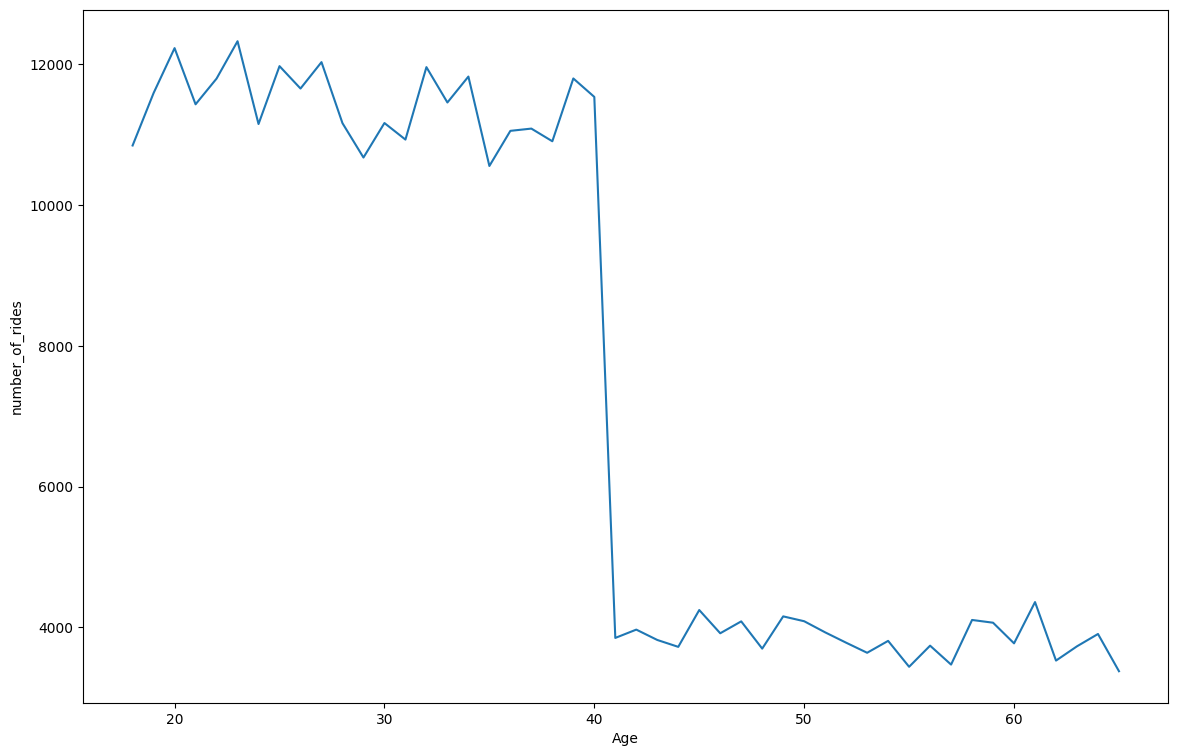

In [ ]:
#plotting the same to see the distribution of rides 

sns.lineplot(data=rides_by_age,y='number_of_rides',x='Age')

In [ ]:
#There seems to be inactive users as the count of customer IDs doesn't match the number of users. 

redundant_users = final_df.groupby(['City','Users'])['Customer ID'].count().reset_index().rename(columns={'Customer ID' : 'active_users'})

redundant_users['redundant_ratio'] = 1 - ((redundant_users['active_users'] / redundant_users['Users']))

redundant_users


,City,Users,active_users,redundant_ratio
0,ATLANTA GA,24701,7557,0.69
1,AUSTIN TX,14978,4896,0.67
2,BOSTON MA,80021,29692,0.63
3,CHICAGO IL,164468,56625,0.66
4,DALLAS TX,22157,7017,0.68
5,DENVER CO,12421,3825,0.69
6,LOS ANGELES CA,144132,48033,0.67
7,MIAMI FL,17675,6454,0.63
8,NASHVILLE TN,9270,3010,0.68
9,NEW YORK NY,302149,99885,0.67


<Axes: xlabel='redundant_ratio', ylabel='City'>

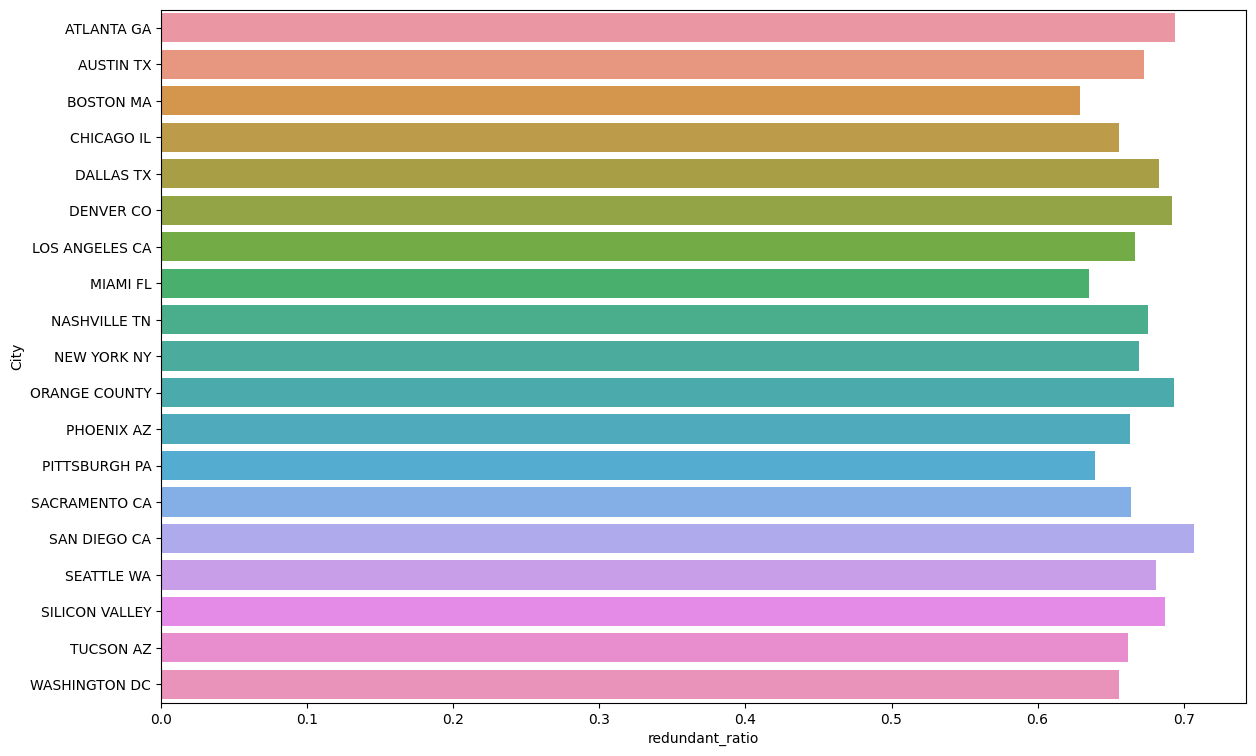

In [ ]:
sns.barplot(data=redundant_users, y='City',x='redundant_ratio')

In [63]:
'''from our investigation so far, we observed that longer the distance travelled, more the profit earned. 
we assume that on an average, men tend to travel large distances compared to women'''
#testing our hypothesis

men_distance = final_df[final_df['Gender'] == "Male"]["KM Travelled"]
women_distance = final_df[final_df['Gender'] == "Female"]["KM Travelled"]

t_statistic, p_value = ttest_ind(men_distance,women_distance)

if p_value < alpha:
    print("reject null hypothesis, there is significant difference between men and women travel distance")
else:
    print("fail to reject null hypothesis, there is no significant difference between men and women travel distance")



fail to reject null hypothesis, there is no significant difference between men and women travel distance


Text(0.5, 0, 'Gender')

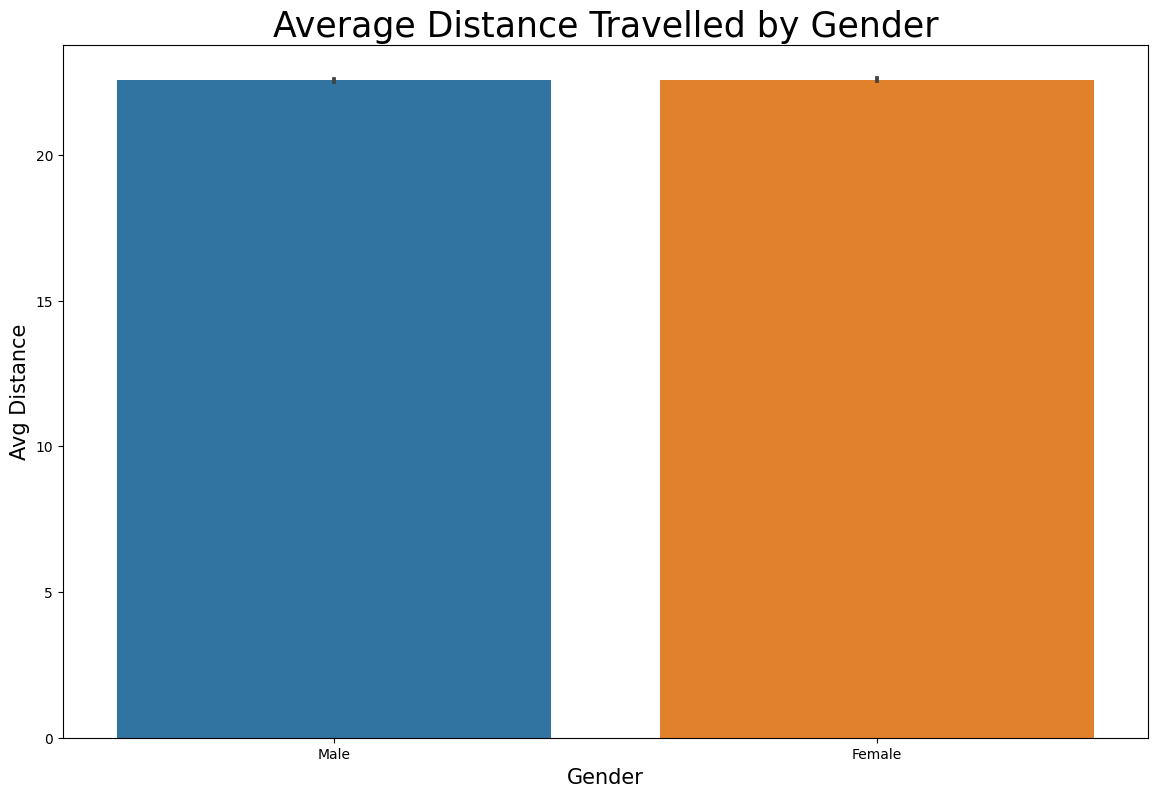

In [90]:
#plotting the average KM travelled b/w men and women 
sns.barplot(final_df,x="Gender",y="KM Travelled")
plt.title("Average Distance Travelled by Gender",fontsize = 25)
plt.ylabel("Avg Distance",fontsize=15)
plt.xlabel("Gender",fontsize=15)

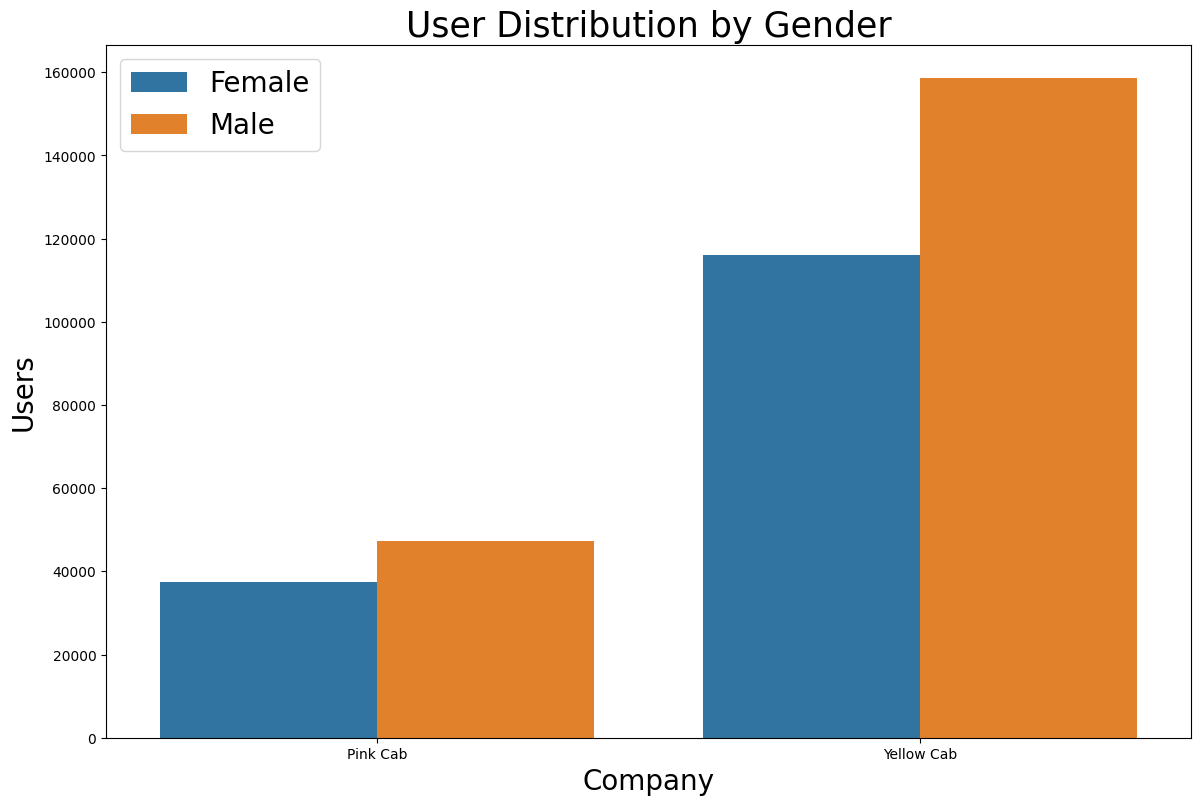

In [149]:
users_by_gender = final_df.groupby(["Company","Gender"])["Customer ID"].count().reset_index()
sns.barplot(data=users_by_gender,x="Company",y="Customer ID",hue="Gender")
plt.ylabel("Users",fontsize=20)
plt.xlabel("Company",fontsize=20)
plt.title("User Distribution by Gender",fontsize=25)
plt.legend(fontsize=20)

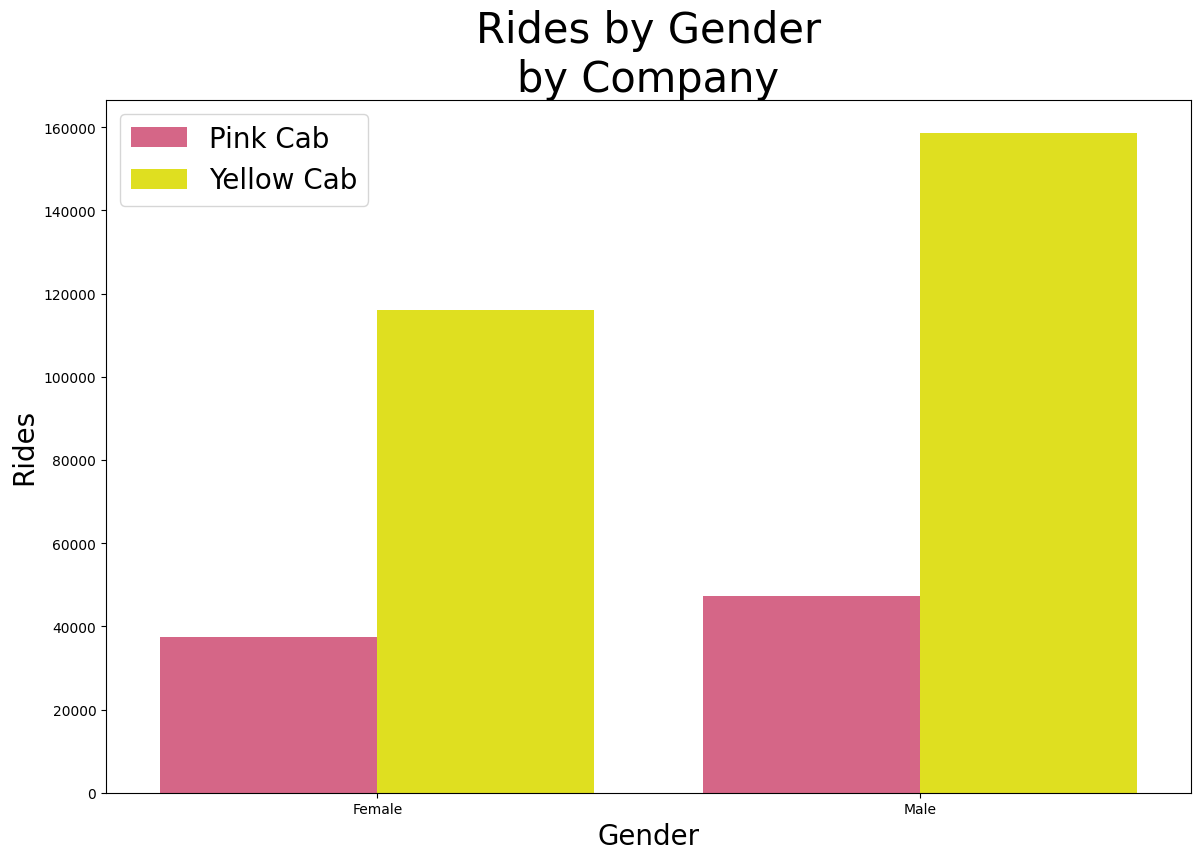

In [151]:
rides_by_gender = final_df.groupby(["Company","Gender"])["Transaction ID"].count().reset_index()
sns.barplot(data=rides_by_gender,x="Gender",y="Transaction ID",hue="Company",palette=[(231/255, 84/255, 128/255),'yellow'])
plt.title("Rides by Gender\nby Company",fontsize=30)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Rides",fontsize=20)
plt.legend(fontsize=20)

Text(0.5, 1.0, 'Retention of Pink Cab Users\nDuring 2016-18')

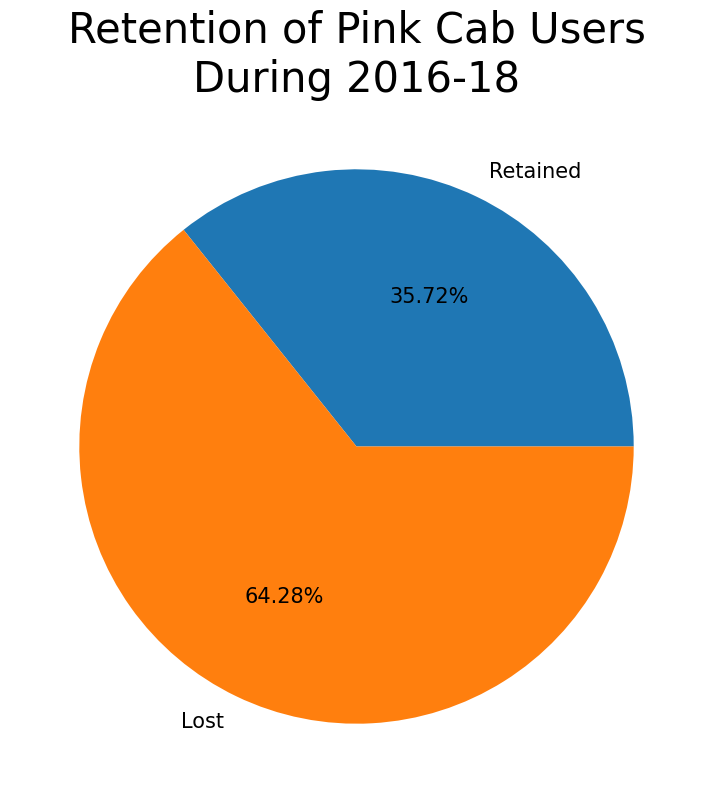

In [135]:
ride_counts_by_customer = final_df.groupby("Company")["Customer ID"].value_counts().reset_index().rename(columns = {"count":"number_of_rides"})
pink_retained_customers = ride_counts_by_customer[(ride_counts_by_customer["Company"] == "Pink Cab") & (ride_counts_by_customer["number_of_rides"] > 2)]["number_of_rides"].count()
pink_lost_customers = ride_counts_by_customer[(ride_counts_by_customer["Company"] == "Pink Cab") & (ride_counts_by_customer["number_of_rides"] < 3)]["number_of_rides"].count()


plt.pie(x=(pink_retained_customers,pink_lost_customers),labels=("Retained","Lost"),autopct="%1.2f%%", textprops={'fontsize':15})
plt.title("Retention of Pink Cab Users\nDuring 2016-18",fontsize=30)

Text(0.5, 1.0, 'Retention of Yellow Cab Users\nDuring 2016-18')

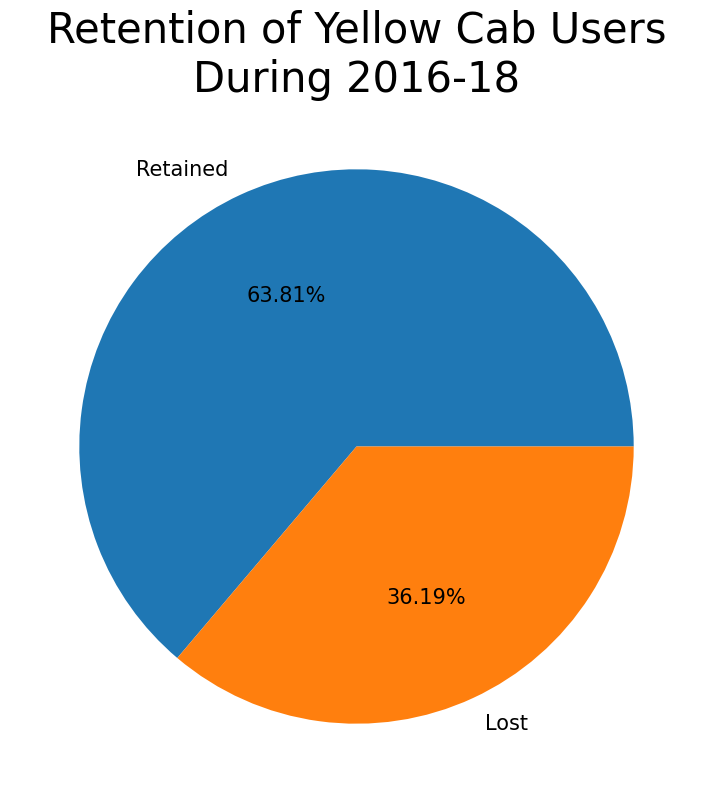

In [136]:
yellow_retained_customers = ride_counts_by_customer[(ride_counts_by_customer["Company"] == "Yellow Cab") & (ride_counts_by_customer["number_of_rides"] > 2)]["number_of_rides"].count()
yellow_lost_customers = ride_counts_by_customer[(ride_counts_by_customer["Company"] == "Yellow Cab") & (ride_counts_by_customer["number_of_rides"] < 2)]["number_of_rides"].count()


plt.pie(x=(yellow_retained_customers,yellow_lost_customers),labels=("Retained","Lost"),autopct="%1.2f%%", textprops={'fontsize': 15})
plt.title("Retention of Yellow Cab Users\nDuring 2016-18",fontsize=30)

In [192]:
#analysing us airports
us_airports = pd.read_csv(r"C:\Users\visha\Downloads\us_airports.csv")
us_airports.head()

,City,Airports
0,NEW YORK NY,2
1,CHICAGO IL,2
2,LOS ANGELES CA,1
3,MIAMI FL,3
4,SILICON VALLEY,0


In [187]:
cities_population = final_df.groupby(["City", "Population"])["Profit"].sum().reset_index()
cities_population

,City,Population,Profit
0,ATLANTA GA,814885,8.424329e+05
1,AUSTIN TX,698371,5.267010e+05
2,BOSTON MA,248968,1.768719e+06
3,CHICAGO IL,1955130,3.387313e+06
4,DALLAS TX,942908,1.128733e+06
5,DENVER CO,754233,3.975850e+05
6,LOS ANGELES CA,1595037,4.411709e+06
7,MIAMI FL,1339155,7.583012e+05
8,NASHVILLE TN,327225,1.495322e+05
9,NEW YORK NY,8405837,2.796256e+07


In [193]:
us_airports = pd.merge(left=cities_population,right=us_airports,how="left",on="City")
us_airports.head()

,City,Population,Profit,Airports
0,ATLANTA GA,814885,8.424329e+05,4
1,AUSTIN TX,698371,5.267010e+05,1
2,BOSTON MA,248968,1.768719e+06,1
3,CHICAGO IL,1955130,3.387313e+06,2
4,DALLAS TX,942908,1.128733e+06,1


In [197]:
#cities with more number of airports are likely to attract more passengers who use cab services. 
#Null hypothesis is that number of airports is correlated to profits. 

pearson_coefficient, p_value = pearsonr(us_airports["Profit"],us_airports["Airports"])
pearson_coefficient, p_value

(-0.008305120675239412, 0.9730813938156364)

fail to reject null hypothesis, this means that there is no statistical significance between the number of airports and Profits earned

<Axes: xlabel='Profit', ylabel='Airports'>

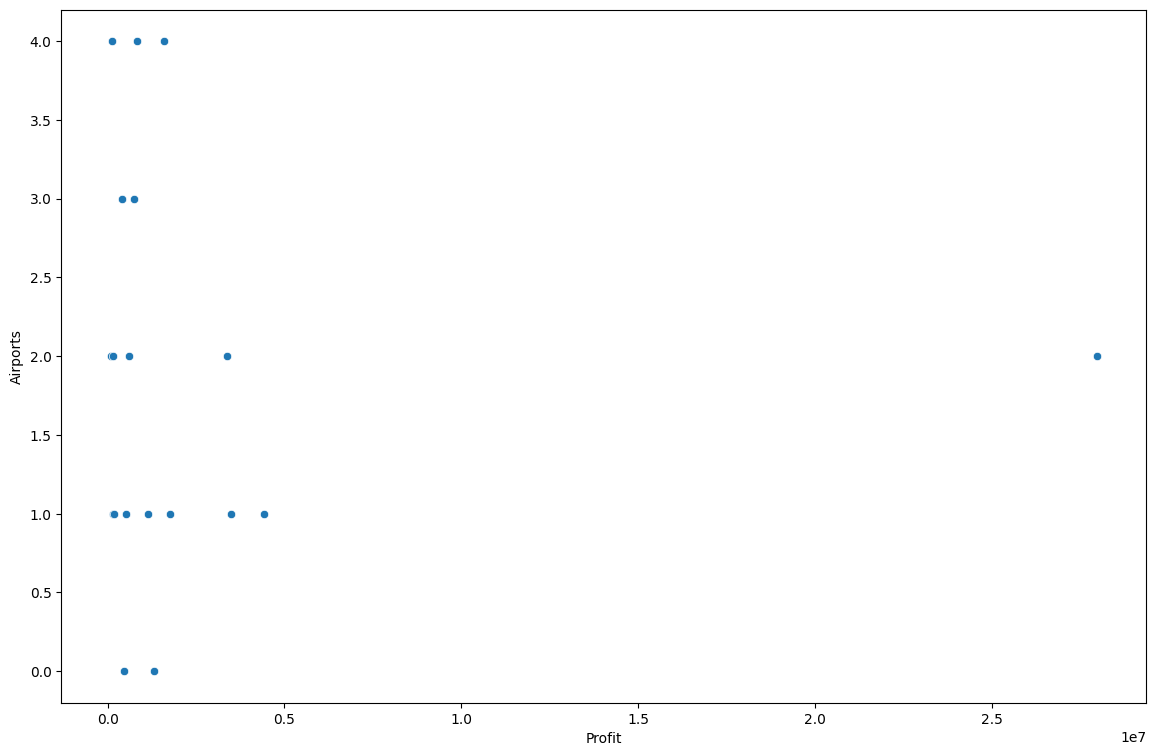

In [198]:
#plotting to understand profit and airport relation
sns.scatterplot(data=us_airports,y="Airports",x="Profit")

In [297]:
#Understanding the impact of holidays
del(us_holidays,data)
us_holidays = pd.read_csv(r"C:\Users\visha\Downloads\us_holiday_dates.csv")
us_holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [299]:
#using numberofrides and profit for analysis
data = final_df.groupby(["Date of Travel","Company"]).agg({"Transaction ID":"count","Profit":"sum"}).reset_index().rename(columns={"Transaction ID": "Rides"})
data.head()

,Date of Travel,Company,Rides,Profit
0,2016-01-02,Pink Cab,41,4809.4210
1,2016-01-02,Yellow Cab,140,45295.6412
2,2016-01-03,Pink Cab,52,10620.5820
3,2016-01-03,Yellow Cab,126,38449.5288
4,2016-01-04,Pink Cab,4,428.5910


In [300]:
data = data.rename(columns={"Date of Travel":"Date"})
us_holidays[["Date", "Month", "Day", "Year"]] = us_holidays[["Date", "Month", "Day", "Year"]].apply(pd.to_datetime)


In [301]:
data = pd.merge(left=data,right=us_holidays,how='left',on='Date')
data

,Date,Company,Rides,Profit,Holiday,WeekDay,Month,Day,Year
0,2016-01-02,Pink Cab,41,4809.4210,NaN,NaN,NaT,NaT,NaT
1,2016-01-02,Yellow Cab,140,45295.6412,NaN,NaN,NaT,NaT,NaT
2,2016-01-03,Pink Cab,52,10620.5820,NaN,NaN,NaT,NaT,NaT
3,2016-01-03,Yellow Cab,126,38449.5288,NaN,NaN,NaT,NaT,NaT
4,2016-01-04,Pink Cab,4,428.5910,NaN,NaN,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...
2187,2018-12-29,Yellow Cab,630,98814.0764,NaN,NaN,NaT,NaT,NaT
2188,2018-12-30,Pink Cab,56,4019.0560,NaN,NaN,NaT,NaT,NaT
2189,2018-12-30,Yellow Cab,201,19574.0716,NaN,NaN,NaT,NaT,NaT
2190,2018-12-31,Pink Cab,58,4444.1560,New Year’s Eve,Monday,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000000031,1970-01-01 00:00:00.000002018


In [302]:
data = data.drop(['WeekDay','Year','Month','Day'],axis=1)

In [303]:
#dropping non holiday records
data.dropna(axis=0,how='any',inplace=True)
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data

,Date,Company,Rides,Profit,Holiday,Month,Day
32,2016-01-18,Pink Cab,20,1130.5250,"Martin Luther King, Jr. Day",1,18
33,2016-01-18,Yellow Cab,85,15412.4904,"Martin Luther King, Jr. Day",1,18
86,2016-02-14,Pink Cab,74,6086.3250,Valentine’s Day,2,14
87,2016-02-14,Yellow Cab,303,74591.2416,Valentine’s Day,2,14
88,2016-02-15,Pink Cab,14,1135.4160,Washington's Birthday,2,15
...,...,...,...,...,...,...,...
2177,2018-12-24,Yellow Cab,216,30995.7512,Christmas Eve,12,24
2178,2018-12-25,Pink Cab,69,4317.1370,Christmas Day,12,25
2179,2018-12-25,Yellow Cab,215,26666.5252,Christmas Day,12,25
2190,2018-12-31,Pink Cab,58,4444.1560,New Year’s Eve,12,31


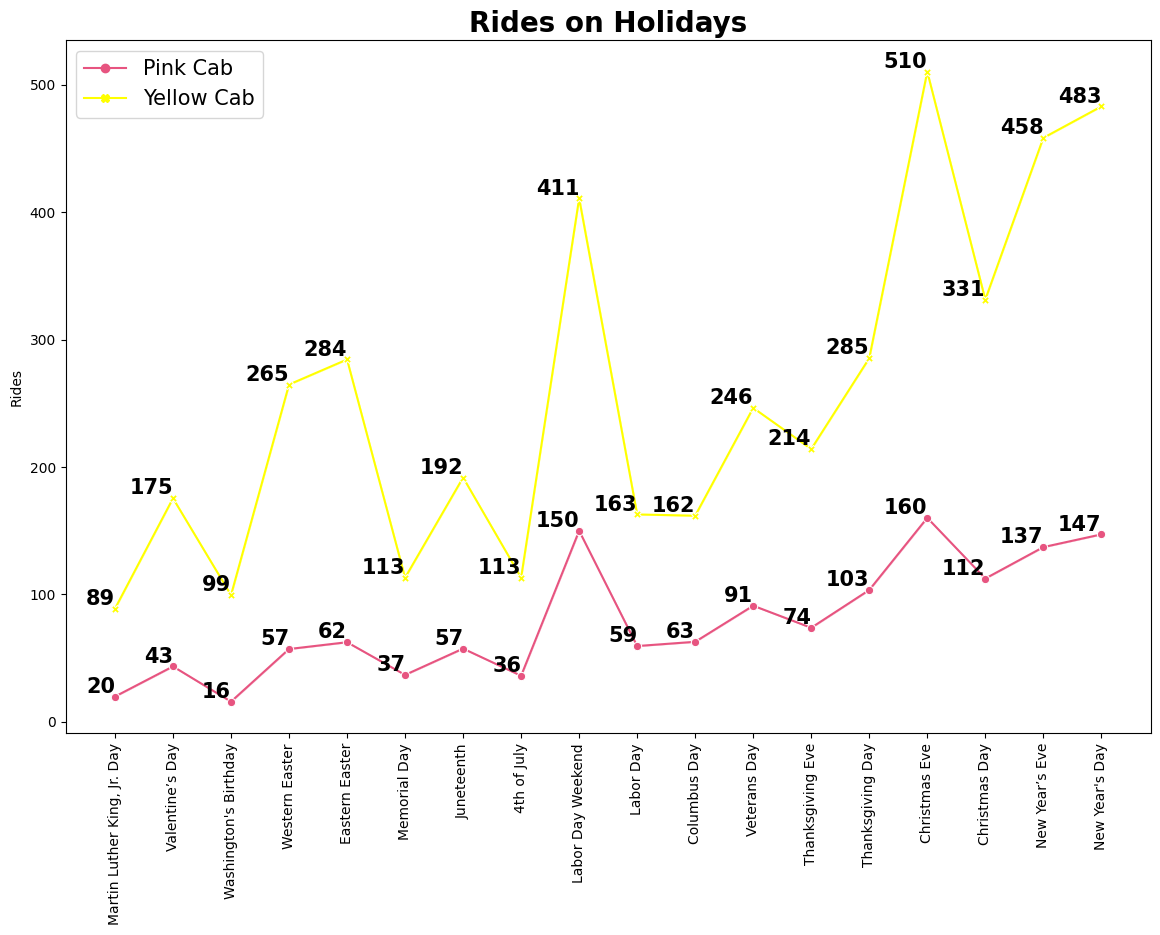

In [330]:
plot = sns.lineplot(data=data, x="Holiday", y="Rides", hue="Company", errorbar=('ci', 0), palette=[(231/255, 84/255, 128/255), 'yellow'],
                    markers=True, style="Company", dashes=False)

for line in plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.0f}', color='black', ha='right', va='bottom', fontsize=15, weight='bold')

plt.title("Rides on Holidays",fontsize=20,fontweight="bold")        
plt.legend(fontsize=15)
plt.xticks(rotation='vertical')
plt.xlabel('')
plt.ylabel("Rides",fontsize=10)
plt.show()